# Задание   

Напишите скрипт на Python, получающий данные из HTML таблицы с данными по рождаемости в России (ссылка ниже) и визуализируйте их на графике. Готовый файл в формате .ipynb загрузите на любой файлообменник, а в поле ответа укажите ссылку. 
https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html

In [134]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import requests

In [135]:
URL = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'html.parser')

In [136]:
i = 0
year = []
people = []
for row in soup.find_all('td', attrs = {'style':'text-align: center;'}):
    if i % 2 == 0:
        year.append(row.text)
    else:
        people.append(row.text)
    i += 1

In [137]:
df = pd.DataFrame()
df['year'] = year
df['people'] = people
df = df.drop(df.index[[0]]).reset_index(drop=True)
df.head()

,year,people
0,1959,2 796 228
1,1960,2 782 353
2,1961,2 662 135
3,1962,2 482 539
4,1963,2 331 505


In [138]:
df = df.replace(r'\s+','',regex=True)
df = df.apply(pd.to_numeric)

In [139]:
fig = px.bar(df, x='year', y='people', labels={'year':'Год', 'people':'Количество родившихся, млн'},
                                       title='Таблица рождаемости по годам (Россия)')
fig.show()

*Почему-то на гитхабе не отображается интерактивный график библиотеки `ploply`.    
Поэтому (если код не будете переносить локально) продублирую график через `matplotlib`*

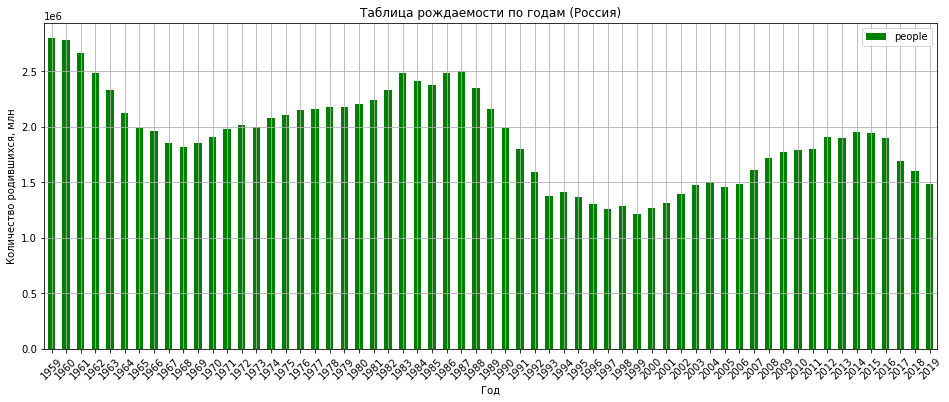

In [140]:
df.plot(x='year', y='people', kind='bar', title='Таблица рождаемости по годам (Россия)', 
                                       color='green', rot=45, figsize=(16,6), grid=True)
plt.ylabel('Количество родившихся, млн')
plt.xlabel('Год');